## Overview
A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem
Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

exploring differeent ideas on what define a successful film 
profit margin based on domestic gross 


In [1]:
!ls Data

bom.movie_gross.csv       imdb.title.crew.csv       rt.reviews.tsv
imdb.name.basics.csv      imdb.title.principals.csv tmdb.movies.csv
imdb.title.akas.csv       imdb.title.ratings.csv    tn.movie_budgets.csv
imdb.title.basics.csv     rt.movie_info.tsv


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
bom_df= pd.read_csv('data/bom.movie_gross.csv')
imbd_name_df= pd.read_csv('data/imdb.name.basics.csv')
akas_df=pd.read_csv('data/imdb.title.akas.csv')
basics_df= pd.read_csv('data/imdb.title.basics.csv')
crew_df= pd.read_csv('data/imdb.title.crew.csv')
principals_df= pd.read_csv('data/imdb.title.principals.csv')
ratings_df=pd.read_csv('data/imdb.title.ratings.csv')

## Data Preparation

In [4]:
import string

#removing punctuations 
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

bom_df["title"] = bom_df['title'].apply(remove_punctuations)
bom_df["title"]= bom_df["title"].str.lower()

In [5]:
#renaming the column to merge tables
akas_df.rename(columns={'title_id':'tconst'}, inplace=True)
akas_df.rename(columns={'title':'title_akas'}, inplace=True)
#removing punctuations and lower case title
akas_df["title_akas"] = akas_df['title_akas'].apply(remove_punctuations)
basics_df["primary_title"] = basics_df['primary_title'].apply(remove_punctuations)
akas_df["title_akas"] = akas_df['title_akas'].str.lower()
basics_df["primary_title"]= basics_df['primary_title'].str.lower()

In [6]:
#combining akas and basics 
imbd_info_df1= akas_df.merge(basics_df, on = 'tconst', how ='outer')
imbd_info_df1.head()

,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"


In [7]:
#merging ratings 
imbd_info_df2 = imbd_info_df1.merge(ratings_df, on='tconst',how ='outer')
imbd_info_df2.head()

,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0


In [8]:
#merging bom 
imbd_info_df3 = imbd_info_df2.merge(bom_df,left_on='primary_title', right_on='title', how ='outer')
imbd_info_df3.head()

,tconst,ordering,title_akas,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0369610,10.0,джурасик свят,BG,bg,NaN,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
1,tt0369610,11.0,jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
2,tt0369610,12.0,jurassic world o mundo dos dinossauros,BR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
3,tt0369610,13.0,o mundo dos dinossauros,BR,NaN,NaN,short title,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0
4,tt0369610,14.0,jurassic world,FR,NaN,imdbDisplay,NaN,0.0,jurassic world,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,jurassic world,Uni.,652300000.0,"1,019.4",2015.0


imbd_cast_df1 = imbd_name_df.merge(principals_df, on='nconst')
imbd_cast_df1.head()

imbd_cast_df2 = imbd_cast_df1.merge(crew_df, on='tconst')
imbd_cast_df2.head()

In [9]:
#converting foreign gross column into float
imbd_info_df3['foreign_gross']= imbd_info_df3['foreign_gross'].astype(str)
imbd_info_df3['foreign_gross'] = imbd_info_df3['foreign_gross'].apply(remove_punctuations)
imbd_info_df3['foreign_gross']= imbd_info_df3['foreign_gross'].astype(float)

In [10]:
#selecting only the necessary columns
imbd_info_df_main= imbd_info_df3[['genres','domestic_gross','averagerating','numvotes', 'foreign_gross', 'start_year', 'region']]

In [11]:
#remove null
imbd_info_df_main_clean= imbd_info_df_main.dropna(axis=0).copy()
imbd_info_df_main_clean.head()

,genres,domestic_gross,averagerating,numvotes,foreign_gross,start_year,region
0,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,BG
1,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,JP
2,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,BR
3,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,BR
4,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,FR


In [12]:
#remove duplicates
imbd_info_df_main_clean1= imbd_info_df_main_clean.drop_duplicates().copy()
imbd_info_df_main_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36983 entries, 0 to 333438
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          36983 non-null  object 
 1   domestic_gross  36983 non-null  float64
 2   averagerating   36983 non-null  float64
 3   numvotes        36983 non-null  float64
 4   foreign_gross   36983 non-null  float64
 5   start_year      36983 non-null  float64
 6   region          36983 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.3+ MB


In [13]:
#creating total rating to find weighted rating 
imbd_info_df_main_clean1.eval('total_rating= averagerating *numvotes', inplace=True)

In [20]:
imbd_info_df_main_clean1.head().reset_index()

,index,genres,domestic_gross,averagerating,numvotes,foreign_gross,start_year,region,total_rating
0,0,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,BG,3775366.0
1,1,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,JP,3775366.0
2,2,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,BR,3775366.0
3,4,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,FR,3775366.0
4,5,"Action,Adventure,Sci-Fi",652300000.0,7.0,539338.0,10194.0,2015.0,GR,3775366.0


## Data Modeling

<AxesSubplot:xlabel='region'>

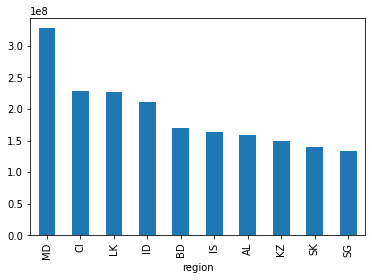

In [34]:
gross_per_genre = imbd_info_df_main_clean1.groupby(['region'])['domestic_gross'].mean().sort_values(ascending=False)
gross_per_genre.head(10).plot(kind = 'bar')

In [19]:
imbd_info_df_main_clean1.corr()['domestic_gross'].sort_values()

start_year        0.118375
averagerating     0.255971
total_rating      0.623412
numvotes          0.650849
foreign_gross     0.800078
domestic_gross    1.000000
Name: domestic_gross, dtype: float64

<AxesSubplot:xlabel='genres'>

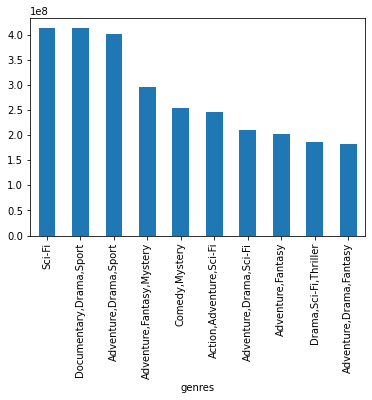

In [35]:
#top genres based on domestic gross 
gross_per_genre1 = imbd_info_df_main_clean1.groupby(['genres'])['domestic_gross'].mean().sort_values(ascending=False)
gross_per_genre1.head(10).plot(kind = 'bar')

In [23]:
#stats on domestic gross 
gross_per_genre.apply(['mean', 'median', 'std', 'max', 'min'])

mean      4.609081e+07
median    2.911936e+07
std       6.290092e+07
max       4.126000e+08
min       8.000000e+02
Name: domestic_gross, dtype: float64

In [24]:
#outlier
gross_per_genre.max()/gross_per_genre.std()

6.559522118340857

In [25]:
#outlier
gross_per_genre.min()/gross_per_genre.std()

1.2718414189705976e-05

In [26]:
#finding weighted rating
totalvote_per_genre = imbd_info_df_main_clean1.groupby(['genres'])['numvotes'].sum()
totalvote_df = totalvote_per_genre.to_frame()
totalrating_per_genre = imbd_info_df_main_clean1.groupby(['genres'])['total_rating'].sum()
totalrating_df = totalrating_per_genre.to_frame()
gross_df= gross_per_genre.to_frame()

In [27]:
weighted_rating = totalrating_df.merge(totalvote_df, on='genres', how='outer')
weighted_rating['weighted_rating']= weighted_rating['total_rating']/weighted_rating['numvotes']
weighted_rating.reset_index()

,genres,total_rating,numvotes,weighted_rating
0,Action,8.440362e+06,1514054.0,5.574677
1,"Action,Adventure",6.724624e+05,113186.0,5.941215
2,"Action,Adventure,Animation",8.639435e+08,112485354.0,7.680498
3,"Action,Adventure,Biography",1.780843e+08,22881778.0,7.782800
4,"Action,Adventure,Comedy",1.376563e+09,183844163.0,7.487664
...,...,...,...,...
264,"Romance,Sci-Fi,Thriller",5.656258e+07,7966560.0,7.100000
265,"Romance,Thriller",3.799409e+06,613684.0,6.191149
266,Sci-Fi,8.400000e+01,20.0,4.200000
267,Thriller,7.700500e+04,14577.0,5.282637


In [28]:
#creating the final dataframe for scatter plots 
final_df= gross_df.merge(weighted_rating, on= 'genres')
#final_df['numvotes'].apply(['mean', 'median', 'std', 'max', 'min'])

In [29]:
#finding to be shown through scatter plots 
correlation_dome = final_df.corr()['weighted_rating'].sort_values()
correlation_dome 

domestic_gross     0.078576
numvotes           0.160907
total_rating       0.174517
weighted_rating    1.000000
Name: weighted_rating, dtype: float64

Text(0, 0.5, 'number of votes')

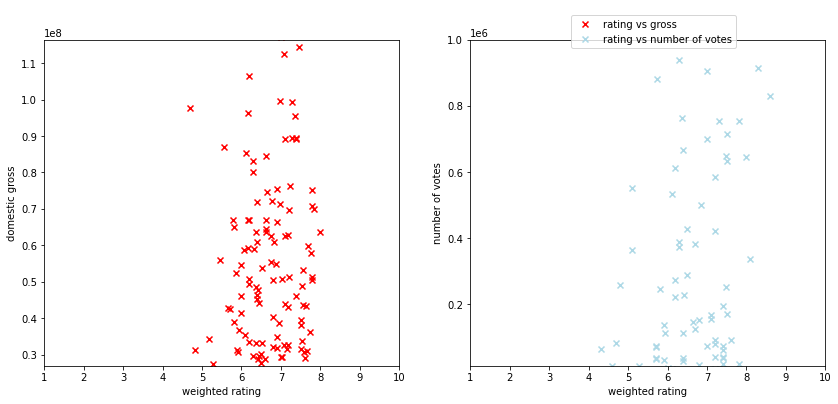

In [30]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,6), ncols=2)
ax1.set_xlim(1, 10) 
ax1.set_ylim(2.690981e+07, 1.164440e+08)
ax2.set_xlim(1, 10) 
ax2.set_ylim(1.471160e+04, 1.0e+06)

ax1.scatter(final_df['weighted_rating'], final_df['domestic_gross'], color='red', marker='x')
ax2.scatter(final_df['weighted_rating'], final_df['numvotes'], color='lightblue', marker='x')

fig.legend(labels=["rating vs gross", "rating vs number of votes"], loc=(.68, .88));
ax1.set_xlabel('weighted rating')
ax1.set_ylabel('domestic gross')

ax2.set_xlabel('weighted rating')
ax2.set_ylabel('number of votes')


## Evaluation